### NATURAL LANGUAGE PROCESSING - INDIVIDUAL_COURSEWORK : Nimisha Rajesh (6829882)


### Biomedical Sequence Classification: 
### Detecting Abbreviations and Long Forms in PLOS Journal Articles:

##### Dataset Overview:
->The dataset is for sequence classification, detecting abbreviations (AC) and long forms (LF) in text. <br>
->Follows BIO tagging scheme: B-AC for abbreviation beginning, B-LF for long form beginning, I-LF for inside long form, B-O or O for irrelevant tokens.<br>
->Includes optional part-of-speech (POS) tags.<br>
->Sourced from biomedical scientific literature, specifically PLOS journal articles.

##### Accessing Dataset:
->Available on Hugging Face.<br>
->Optional filtered version (PLOD-filtered) is available for experimentation.

##### Objective:
->Build a sequence classifier prototype for the provided PLOD dataset.<br>
->Detect abbreviations and long forms in text using labelled data.<br>
->Input tokens assigned only one label during prediction (inference).<br>
->Important for information extraction from documents, particularly in the biomedical domain.

##### Experiment Outcome
In this experiment, I'm checking out different graphs to understand the dataset better. The idea is to make graphs that show important stuff about how the data works. Looking at these graphs helps us see how the data is organized and find any important trends or weird things. Doing this helps us understand the data better and make smarter decisions based on it.

In [1]:
# Setting up Python to handle data by installing all the important libraries required.
# These libraries should be installed once if it is not already present
!pip install pandas numpy scikit-learn gensim nltk tensorflow
!pip install wordcloud

In [2]:
%pip install datasets
%pip install transformers
%pip install spacy
%pip install torch
%pip install spacy-transformers
%pip install transformers[torch]
%pip install seqeval

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing essential libraries and modules
# -> pandas and numpy for data manipulation 
# -> sklearn for machine learning tasks
# -> gensim for word embedding models
# -> nltk for text preprocessing and tokenization

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Importing Dataset

->The data provided for analysis is the "surrey-nlp/PLOD-CW" dataset obtained from Hugging Face Datasets. <br>
->This dataset is tailored for computational linguistics tasks and is a subset of the larger PLOD Filtered dataset. <br>
->Its selection ensures easier experimentation without duplicating data, enabling focused analyses on more refined data.

In [4]:
# Loading the "surrey-nlp/PLOD-CW" dataset from Hugging Face.

from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

### Dataset Features

The surrey-nlp/PLOD-CW dataset is split into training and testing parts. Here's what they include:
-> Tokens: Individual words or symbols.<br>
-> POS Tags: Grammatical details.<br>
-> NER Tags: Classifications like names or places.<br>
Both sets share the same features for consistent model training and evaluation. Examining these features helps in designing models, while the validation set is set aside for now.

In [5]:
#Showing the features of the train and test subsets of the PLOD-CW dataset
#Helps to grasp their structure and the data they contain.

print(dataset['train'].features)
print('------------------------------------------------------------------------------------------------------------------')
print(dataset['test'].features)

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'ner_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}
------------------------------------------------------------------------------------------------------------------
{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'ner_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}


### Conversion and Preview

-> Converting the training split of the surrey-nlp/PLOD-CW dataset into a Pandas DataFrame <br>
-> Using the head() function, I previewed the initial rows of the dataset to understand its structure, including annotations for named entity recognition and part-of-speech tagging, which are crucial for further analysis.

In [6]:
# Convert the 'train' split of the PLOD-CW dataset to a Pandas DataFrame for easier manipulation and analysis.
df = dataset['train'].to_pandas()

# Display the first few rows of the DataFrame to preview its structure and the types of data it contains.
df.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


### Analysis of Data Visualization 

#### Distribution of data
-> In this analysis, we take top 10 lables and find the distribution of data across them. <br>
-> This gives the overall distribution from dataset

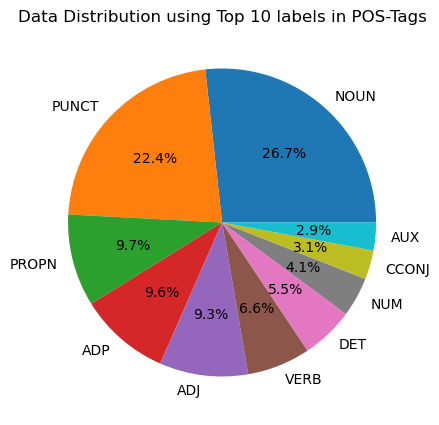

In [48]:
df_t = dataset['test'].to_pandas()
# Count the number of samples for each label
label_counts = df_t['pos_tags'].explode().value_counts()

# Get the top 10 labels
top_labels = label_counts[:10]

# Create a pie chart of the top 10 labels
plt.figure(figsize=(10, 5))
plt.pie(top_labels, labels=top_labels.index, autopct='%1.1f%%')
plt.title('Data Distribution using Top 10 labels in POS-Tags')
plt.show()

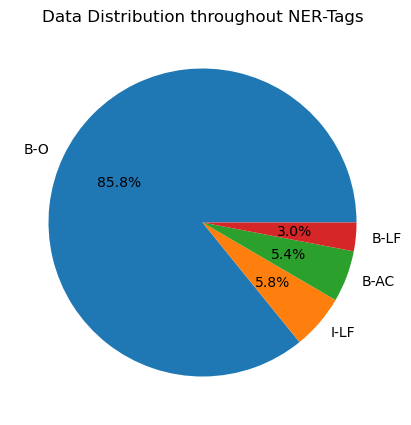

In [49]:
# Count the number of samples for each label
label_counts = df_t['ner_tags'].explode().value_counts()

# Get the top 10 labels
top_labels = label_counts[:]

# Create a pie chart of the top 14 labels
plt.figure(figsize=(10, 5))
plt.pie(top_labels, labels=top_labels.index, autopct='%1.1f%%')
plt.title('Data Distribution throughout NER-Tags')
plt.show()

#### Distribution of Token Lengths
-> I've plotted histograms to showcase the distribution of token lengths in both the training and testing datasets. <br>
-> These visualizations unveil the typical length of token sequences and illustrate the variability within the data. <br>
-> In the training dataset, most token lengths cluster below 50, while the testing data exhibits a similar trend with a narrower range

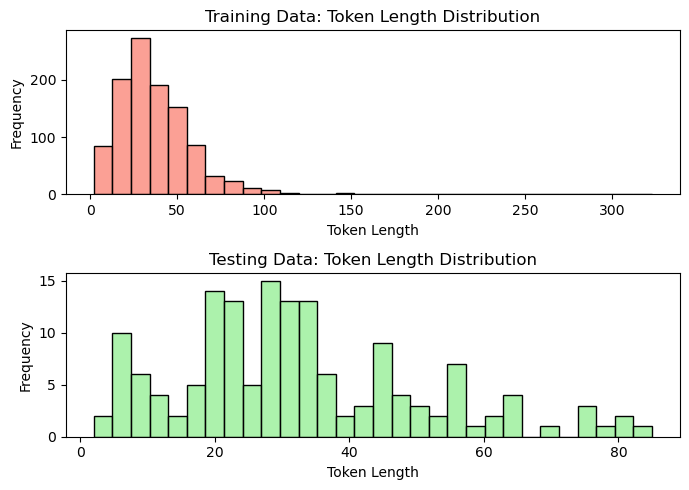

In [17]:
# Convert dataset splits to pandas DataFrames
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()

# Set up subplots for visualizations
fig, axs = plt.subplots(2, figsize=(7, 5))

# Plot token length distribution for training data
sns.histplot(data=pd.Series(train_df['tokens']).apply(len), bins=30, color='salmon', edgecolor='black', ax=axs[0])
axs[0].set_title('Training Data: Token Length Distribution')
axs[0].set_xlabel('Token Length')
axs[0].set_ylabel('Frequency')

# Plot token length distribution for testing data
sns.histplot(data=pd.Series(test_df['tokens']).apply(len), bins=30, color='lightgreen', edgecolor='black', ax=axs[1])
axs[1].set_title('Testing Data: Token Length Distribution')
axs[1].set_xlabel('Token Length')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Distribution of Part-of-Speech (POS) Tags
-> I've analyzed the frequency of POS tags in both data splits. <br>
-> The count plots offer a visual overview of the linguistic makeup of the dataset, emphasizing the occurrence of nouns, adjectives, and verbs. <br>
-> This analysis sheds light on the syntactic structures within the text data.

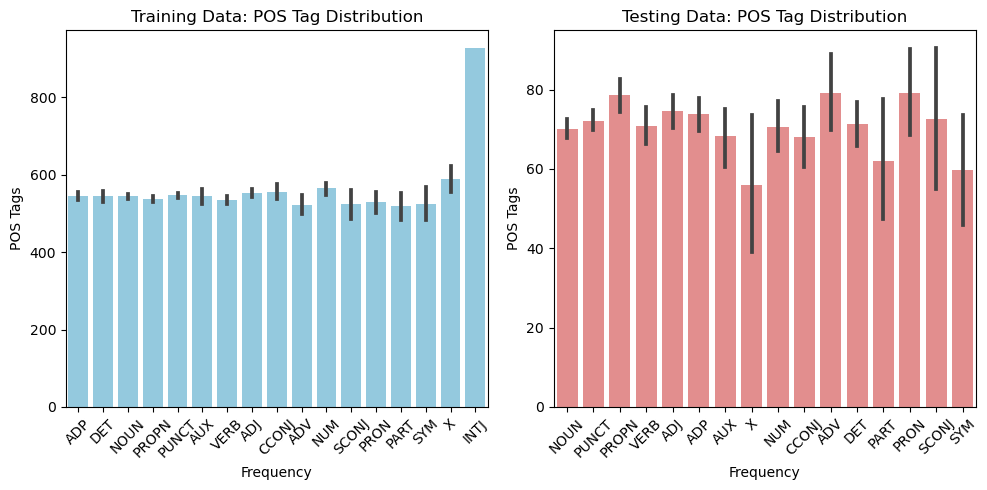

In [24]:
# Plotting POS tag distribution for training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=train_df.explode('pos_tags'), x='pos_tags', y=train_df.explode('pos_tags').index, color='skyblue')
plt.title('Training Data: POS Tag Distribution')
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.xticks(rotation=45)

# Plotting POS tag distribution for testing data
plt.subplot(1, 2, 2)
sns.barplot(data=test_df.explode('pos_tags'), x='pos_tags', y=test_df.explode('pos_tags').index, color='lightcoral')
plt.title('Testing Data: POS Tag Distribution')
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Distribution of Named Entity Recognition (NER) Tags
->I've delved into the distribution of NER tags to understand how frequently each type of named entity appears. <br>
->The count plots depict the occurrence of each tag category. <br>
->Notably, in the training data, one tag category seems to dominate, hinting at a potential imbalance that could affect model training for entity recognition tasks.<br>
->These visualizations play a crucial role in grasping the dataset's characteristics and informing subsequent steps in data preprocessing and model architecture decisions.

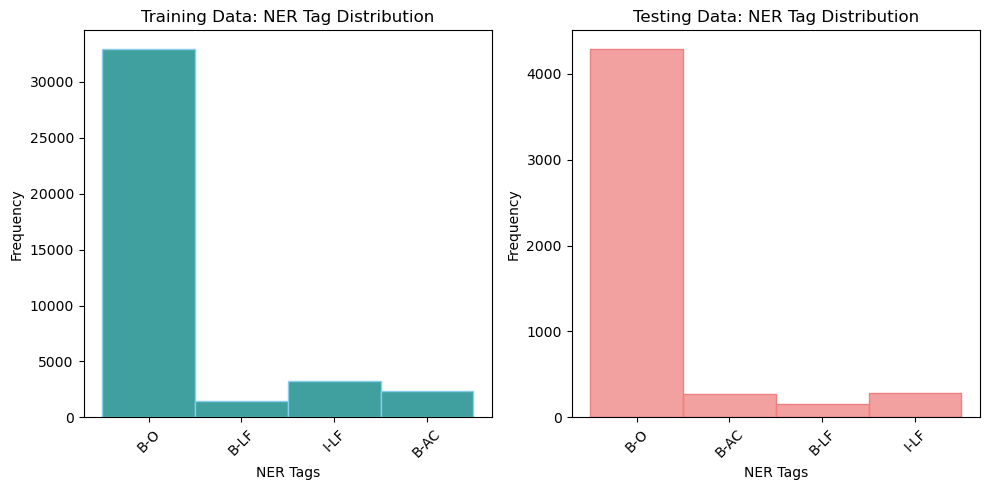

In [27]:
# Plotting NER tag distribution for training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train_df.explode('ner_tags'), x='ner_tags', color='teal', edgecolor='skyblue')
plt.title('Training Data: NER Tag Distribution')
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Plotting NER tag distribution for testing data
plt.subplot(1, 2, 2)
sns.histplot(data=test_df.explode('ner_tags'), x='ner_tags', color='lightcoral', edgecolor='lightcoral')
plt.title('Testing Data: NER Tag Distribution')
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Frequency Analysis of Tokens and Tags

#### Token Frequency Analysis
-> The initial subplot displays the top 10 most frequent tokens in both the training and testing datasets. <br>
-> This examination enabled me to pinpoint the most prevalent words and punctuation marks, which often encompass stop words and common English terms that might not contribute substantial meaning to the text. <br>
->It's interesting to observe the ranking of these tokens across both datasets.

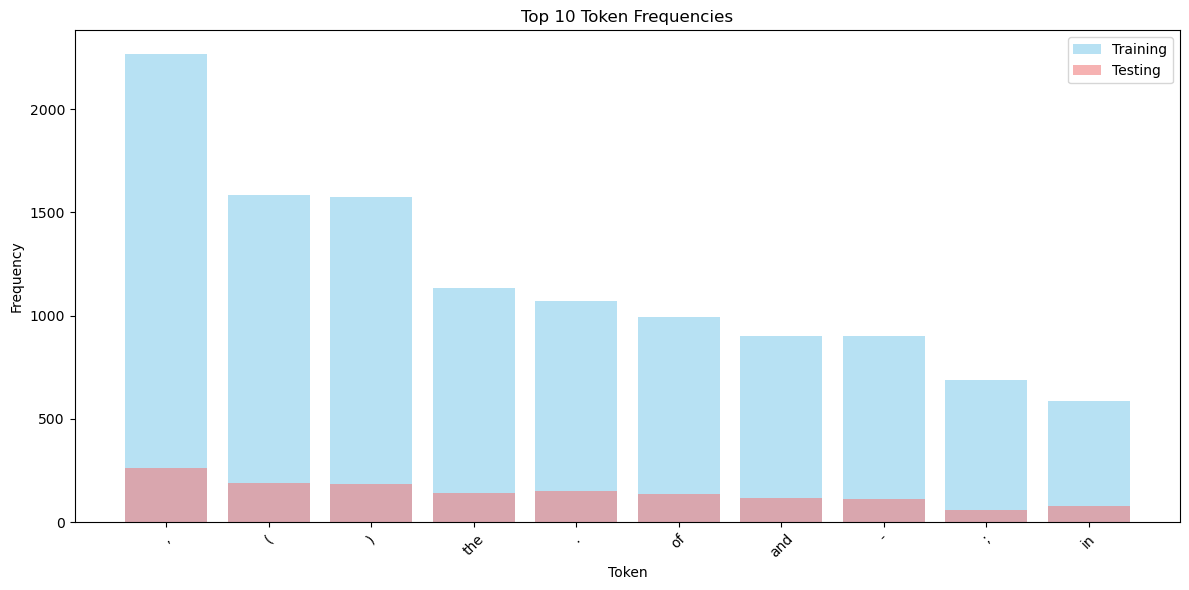

In [34]:
# Calculate token frequencies
train_token_freq = train_df['tokens'].explode().value_counts()
test_token_freq = test_df['tokens'].explode().value_counts()
train_ner_freq = train_df['ner_tags'].explode().value_counts()
test_ner_freq = test_df['ner_tags'].explode().value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Top 10 Token Frequencies
plt.bar(train_token_freq[:10].index, train_token_freq[:10], color='skyblue', alpha=0.6, label='Training')
plt.bar(test_token_freq[:10].index, test_token_freq[:10], color='lightcoral', alpha=0.6, label='Testing')
plt.title('Top 10 Token Frequencies')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### POS Tag Frequency Analysis
-> In the second subplot, I've compared the frequency of each part-of-speech (POS) tag. <br>
-> This visual examination assists in comprehending the grammatical structure of the corpus.

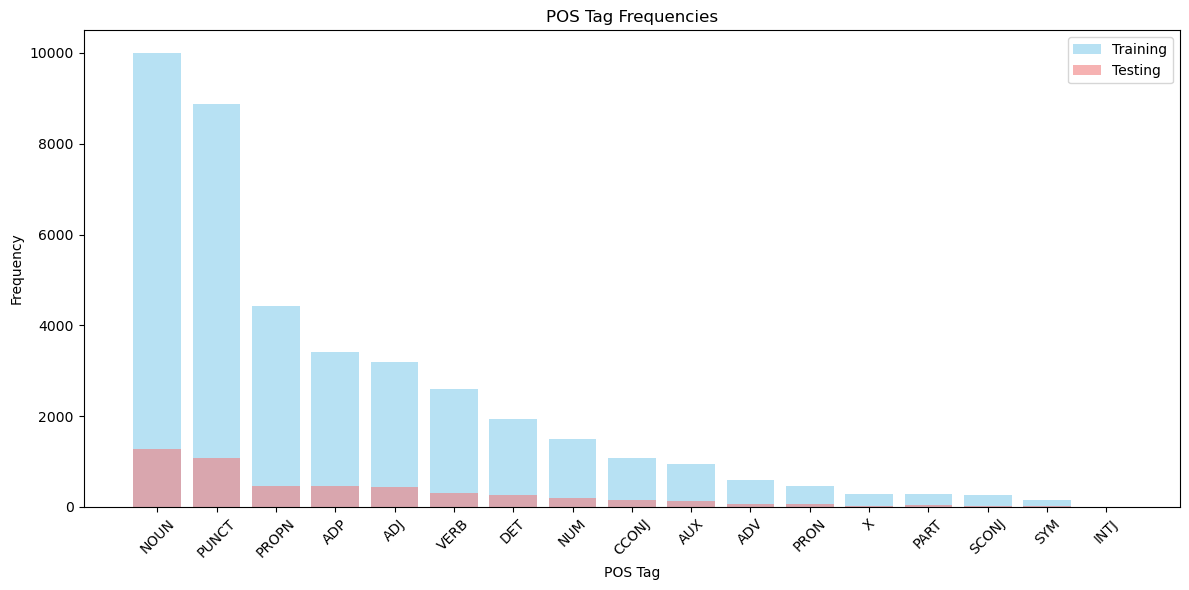

In [32]:
# Compute POS tag frequencies for training and testing data
train_pos_freq = train_df['pos_tags'].explode().value_counts()
test_pos_freq = test_df['pos_tags'].explode().value_counts()

# Plotting POS tag frequencies
plt.figure(figsize=(12, 6))

# Training vs. Testing POS Tag Frequencies
plt.bar(train_pos_freq.index, train_pos_freq, color='skyblue', alpha=0.6, label='Training')
plt.bar(test_pos_freq.index, test_pos_freq, color='lightcoral', alpha=0.6, label='Testing')
plt.title('POS Tag Frequencies')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### NER Tag Frequency Analysis
-> In the final analysis, I scrutinized the named entity recognition (NER) tag frequencies. <br>
-> These tags provided insights into how entities are distributed across the datasets. <br>
-> Examining the disparities between training and testing sets is crucial for model performance, particularly in determining whether the model encounters a balanced representation of entities during training.

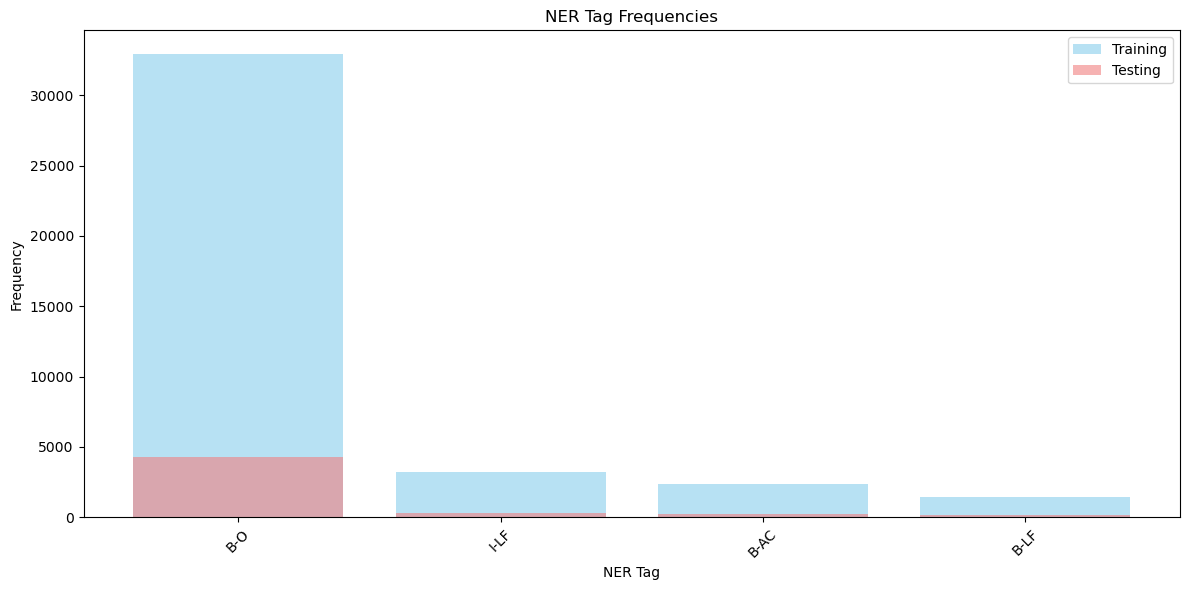

In [36]:
# Plotting NER tag frequencies
plt.figure(figsize=(12, 6))

# Training vs. Testing NER Tag Frequencies
plt.bar(train_ner_freq.index, train_ner_freq, color='skyblue', alpha=0.6, label='Training')
plt.bar(test_ner_freq.index, test_ner_freq, color='lightcoral', alpha=0.6, label='Testing')
plt.title('NER Tag Frequencies')
plt.xlabel('NER Tag')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### POS and NER Tag Length Distribution

-> These histograms reveal the sequence length distribution for both POS and NER tags in the dataset. <br>
-> They offer insights into the complexity and structure of grammatical and named entity sequences.<br>
-> Longer POS sequences suggest more intricate sentences, while NER sequence length reflects the amount of entity information. <br>
-> Understanding these distributions is vital for designing models adept at handling varying sequence lengths in NLP tasks like syntactic parsing and named entity recognition.

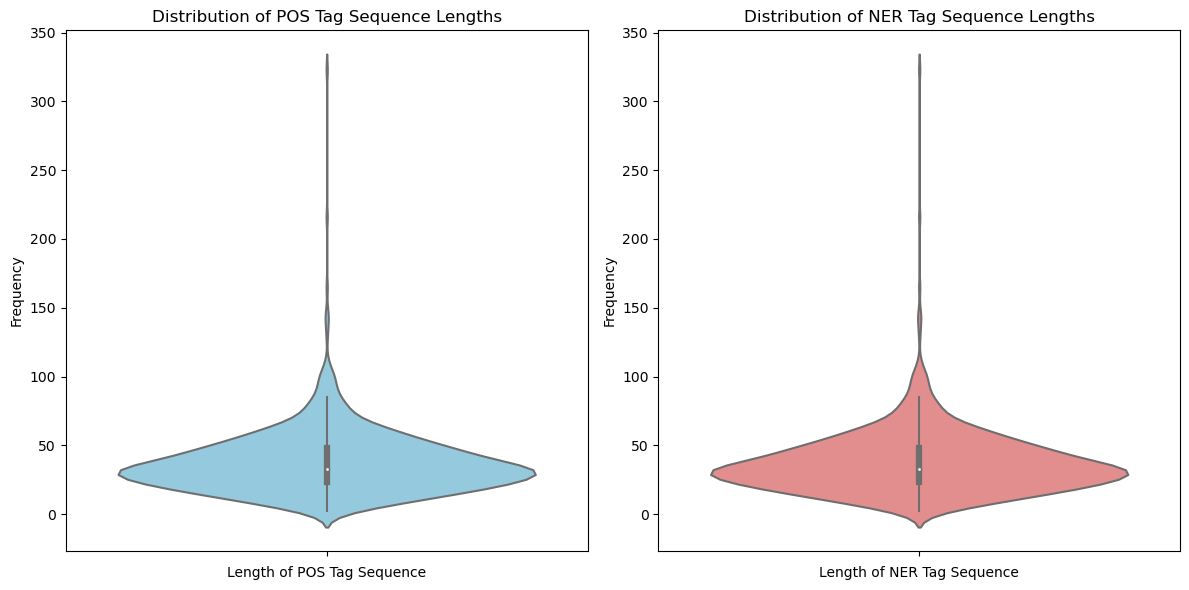

In [40]:
# Calculate sequence lengths for POS and NER tags
pos_lengths = df['pos_tags'].apply(len)
ner_lengths = df['ner_tags'].apply(len)

# Plot the distributions using violin plots
plt.figure(figsize=(12, 6))

# Distribution of POS Tag Sequence Lengths
plt.subplot(1, 2, 1)
sns.violinplot(y=pos_lengths, color='skyblue')
plt.title('Distribution of POS Tag Sequence Lengths')
plt.xlabel('Length of POS Tag Sequence')
plt.ylabel('Frequency')

# Distribution of NER Tag Sequence Lengths
plt.subplot(1, 2, 2)
sns.violinplot(y=ner_lengths, color='lightcoral')
plt.title('Distribution of NER Tag Sequence Lengths')
plt.xlabel('Length of NER Tag Sequence')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Co-occurrence Matrix Visualization
-> The heatmap shows the co-occurrence matrix for tokens in the dataset, indicating how often pairs of tokens appear together. <br>
-> It reveals common patterns and themes by highlighting frequently co-occurring words, aiding exploratory data analysis in NLP for advanced topic modeling or semantic analysis.

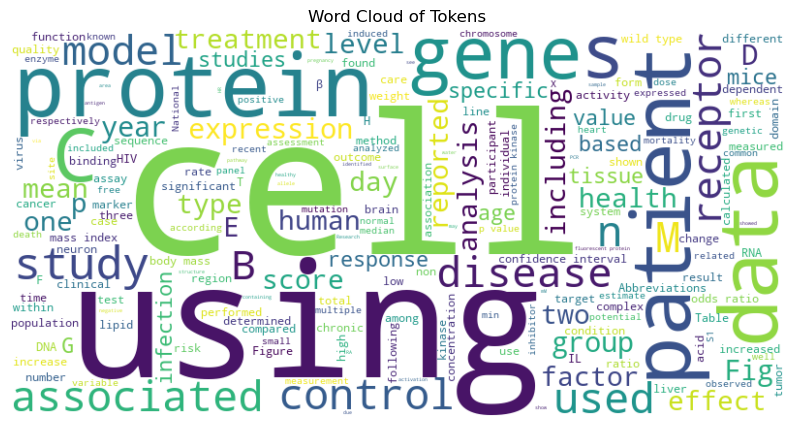

In [43]:
# Assume 'text_data' is a list of strings representing sentences or documents
text_data = df['tokens'].apply(lambda x: ' '.join(x)).tolist()

# Joining all tokens into a single string for word cloud generation
all_text = ' '.join(text_data)

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tokens')
plt.axis('off')
plt.show()
